## Python Libraries - Pandas - Grouping and Pivoting

### Grouping

Grouping and aggregation are some of the most frequently used operations in data analysis, especially while performing exploratory data analysis (EDA), where comparing summary statistics across groups of data is common.

Grouping analysis can be thought of as having three parts, namely:
-  Splitting the data into groups (e.g., groups of customer segments, product categories, etc.)
-  Applying a function to each group (e.g., the mean or total sales of each customer segment)
-  Combining the results into a data structure showing summary statistics


In [31]:
# Loading libraries and file - sales.xlsx - with Market and Region as index
import numpy as np
import pandas as pd

sales=pd.read_excel("sales.xlsx",index_col=1)
sales.rename(columns={"Sales" : "Sales rename tried"},inplace=True)
sales["Positive Profit"]=sales.Profit.apply(lambda x : np.nan if x<0 else x)
sales.reset_index(inplace=True)
sales.set_index(["Market", "Region"], inplace=True)
sales

No_of_Orders    Profit  Sales rename tried  \
Market       Region                                                          
Africa       Western Africa              251 -12901.51            78476.06   
             Southern Africa              85  11768.58            51319.50   
             North Africa                182  21643.08            86698.89   
             Eastern Africa              110   8013.04            44182.60   
             Central Africa              103  15606.30            61689.99   
Asia Pacific Western Asia                382 -16766.90           124312.24   
             Southern Asia               469  67998.76           351806.60   
             Southeastern Asia           533  20948.84           329751.38   
             Oceania                     646  54734.02           408002.98   
             Eastern Asia                414  72805.10           315390.77   
             Central Asia                 37  -2649.76             8190.74   
Europe       Western Europe              964  82091.27           656637.14   
             Southern Europe             338  18911.49           215703.93   
             Northern Europe             367  43237.44           252969.09   
             Eastern Europe              241  25050.69           108258.93   
LATAM        South America               496  12377.59           210710.49   
             Central America             930  74679.54           461670.28   
             Caribbean                   288  13529.59           116333.05   
USCA         Western US                  490  44303.65           251991.83   
             Southern US                 255  19991.83           148771.91   
             Eastern US                  443  47462.04           264973.98   
             Central US                  356  33697.43           170416.31   
             Canada                       49   7246.62            26298.81   

                                Positive Profit  
Market       Region                              
Africa       Western Africa                 NaN  
             Southern Africa           11768.58  
             North Africa              21643.08  
             Eastern Africa             8013.04  
             Central Africa            15606.30  
Asia Pacific Western Asia                   NaN  
             Southern Asia             67998.76  
             Southeastern Asia         20948.84  
             Oceania                   54734.02  
             Eastern Asia              72805.10  
             Central Asia                   NaN  
Europe       Western Europe            82091.27  
             Southern Europe           18911.49  
             Northern Europe           43237.44  
             Eastern Europe            25050.69  
LATAM        South America             12377.59  
             Central America           74679.54  
             Caribbean                 13529.59  
USCA         Western US                44303.65  
             Southern US               19991.83  
             Eastern US                47462.04  
             Central US                33697.43  
             Canada                     7246.62

In [ ]:
# Checking the 'sales' dataframe 


In [23]:
# Grouping the sales dataframe for the sum of the column 'No_of_Orders'
sales[["No_of_Orders"]].groupby("Market").sum()


,No_of_Orders
Market,
Africa,731
Asia Pacific,2481
Europe,1910
LATAM,1714
USCA,1593


In [33]:
# Grouping the sales dataframe over the index 'Market' for the sum of the columns 'No_of_Orders' and 'Sales'
sales[["No_of_Orders","Sales rename tried"]].groupby("Market").sum()


,No_of_Orders,Sales rename tried
Market,,
Africa,731,322367.04
Asia Pacific,2481,1537454.71
Europe,1910,1233569.09
LATAM,1714,788713.82
USCA,1593,862452.84


In [37]:
# Grouping the sales dataframe over the index 'Market' for the maximum value in the column 'No_of_Orders'
sales[["No_of_Orders"]].groupby("Market").max()

,No_of_Orders
Market,
Africa,251
Asia Pacific,646
Europe,964
LATAM,930
USCA,490


In [53]:
# Creating a dataframe 'df' with the mean of column 'Profit' for each market
df=sales[["Profit"]].groupby("Market").mean()
df

,Profit
Market,
Africa,8825.898000
Asia Pacific,32845.010000
Europe,42322.722500
LATAM,33528.906667
USCA,30540.314000


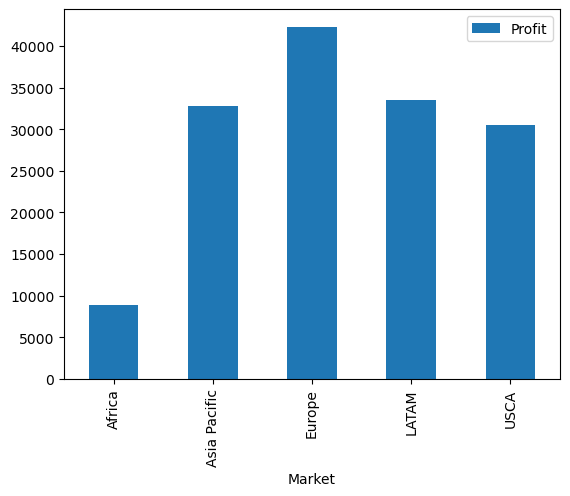

In [93]:
# Plotting a bar graph over 'df'
import matplotlib.pyplot as plt
df.plot(kind = "bar")

plt.show()


### Pivoting

You may want to use pandas pivot tables as an alternative to ```groupby()```. They provide Excel-like functionalities to create aggregate tables. 

In [ ]:
# Read the help documentation for pivot_table
help(pd.DataFrame.pivot_table)

In [81]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Create a new dataframe
users= pd.DataFrame({"weekday" : ['Sun', 'Sun', 'Mon', 'Mon'],
                    "city": ['Austin', 'Dallas', 'Austin', 'Dallas'],
                    "visitors":[139, 237, 326, 456],
                    "signups" : [7, 12, 3, 5]})

In [79]:
# Set the index of the dataframe as 'weekday'
users= pd.DataFrame({"weekday" : ['Sun', 'Sun', 'Mon', 'Mon'],
                    "city": ['Austin', 'Dallas', 'Austin', 'Dallas'],
                    "visitors":[139, 237, 326, 456],
                    "signups" : [7, 12, 3, 5]})
users.set_index("weekday", inplace=True)
users

,city,visitors,signups
weekday,,,
Sun,Austin,139,7
Sun,Dallas,237,12
Mon,Austin,326,3
Mon,Dallas,456,5


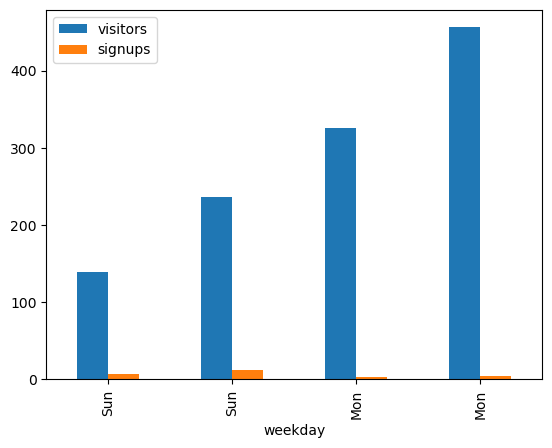

In [91]:
# plot a bar graph over the dataframe 'users'
users= pd.DataFrame({"weekday" : ['Sun', 'Sun', 'Mon', 'Mon'],
                    "city": ['Austin', 'Dallas', 'Austin', 'Dallas'],
                    "visitors":[139, 237, 326, 456],
                    "signups" : [7, 12, 3, 5]})
users.set_index("weekday", inplace=True)
users.plot(kind = "bar")
plt.show()

In [113]:
# Create a pivot table with the columns as 'city' summarising the variable 'visitors'
users= pd.DataFrame({"weekday" : ['Sun', 'Sun', 'Mon', 'Mon'],
                    "city": ['Austin', 'Dallas', 'Austin', 'Dallas'],
                    "visitors":[139, 237, 326, 456],
                    "signups" : [7, 12, 3, 5]})
users.set_index("weekday", inplace=True)
users
visitors_pivot = users.pivot(columns='city', values='visitors')
visitors_pivot

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


In [119]:
# Check the created pivot table
visitors_pivot

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


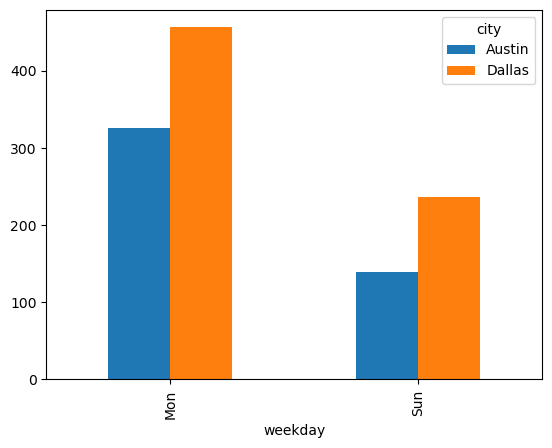

In [123]:
# Draw a bar graph over the created pivot
visitors_pivot.plot(kind="bar")
plt.show()

In [137]:
# Create a pivot table with the columns as 'city' summarising all the variables
visitors_signups = users.pivot(columns='city')
visitors_signups

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

In [139]:
# Check the created pivot table
visitors_signups


visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

<Axes: xlabel='weekday'>

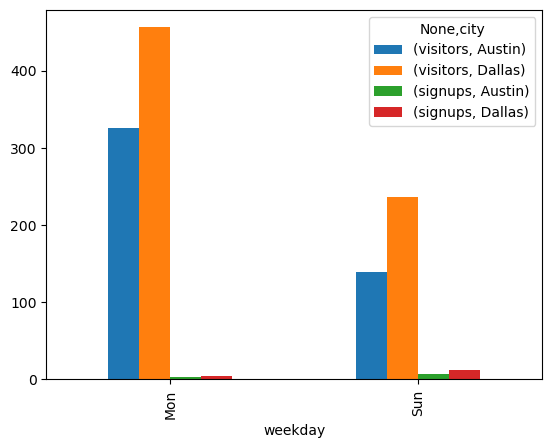

In [141]:
# Draw a bar graph over the created pivot for each variable
visitors_signups.plot(kind="bar")

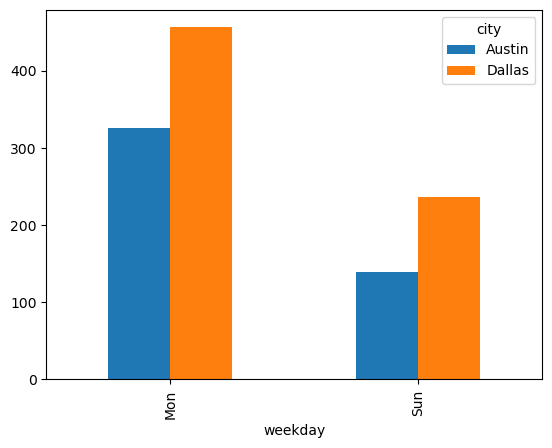

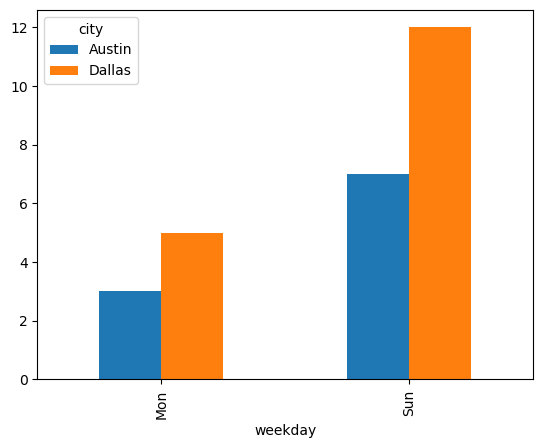

In [143]:
visitors_signups["visitors"].plot(kind="bar")
visitors_signups["signups"].plot(kind="bar")
plt.show()